In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os

HOME =os.getcwd()
HOME

'/kaggle/working'

In [2]:
!pip install ultralytics

from IPython import display
import ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 16.0 MB/s eta 0:00:00a 0:00:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QuwzZuvxyCQ2yTPnfDV9")
project = rf.workspace("roboflow-universe-projects").project("beverage-containers-3atxb")
version = project.version(3)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Beverage-Containers-3 in yolov11:: 100%|██████████| 31302/31302 [00:04<00:00, 7477.77it/s]


## Cutom Training

In [5]:
!ls {dataset.location}

README.dataset.txt  README.roboflow.txt  data.yaml  test  train  valid


In [6]:
!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml  epochs=50 imgsz=640 plots=True

100%|███████████████████████████████████████| 18.4M/18.4M [00:00<00:00, 163MB/s]
Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/kaggle/working/Beverage-Containers-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False

In [7]:
!ls {HOME}/runs/detect/train/

F1_curve.png					  train_batch1.jpg
PR_curve.png					  train_batch2.jpg
P_curve.png					  train_batch34240.jpg
R_curve.png					  train_batch34241.jpg
args.yaml					  train_batch34242.jpg
confusion_matrix.png				  val_batch0_labels.jpg
confusion_matrix_normalized.png			  val_batch0_pred.jpg
events.out.tfevents.1730031737.13a61a6398af.97.0  val_batch1_labels.jpg
labels.jpg					  val_batch1_pred.jpg
labels_correlogram.jpg				  val_batch2_labels.jpg
results.csv					  val_batch2_pred.jpg
results.png					  weights
train_batch0.jpg


## Evaluation

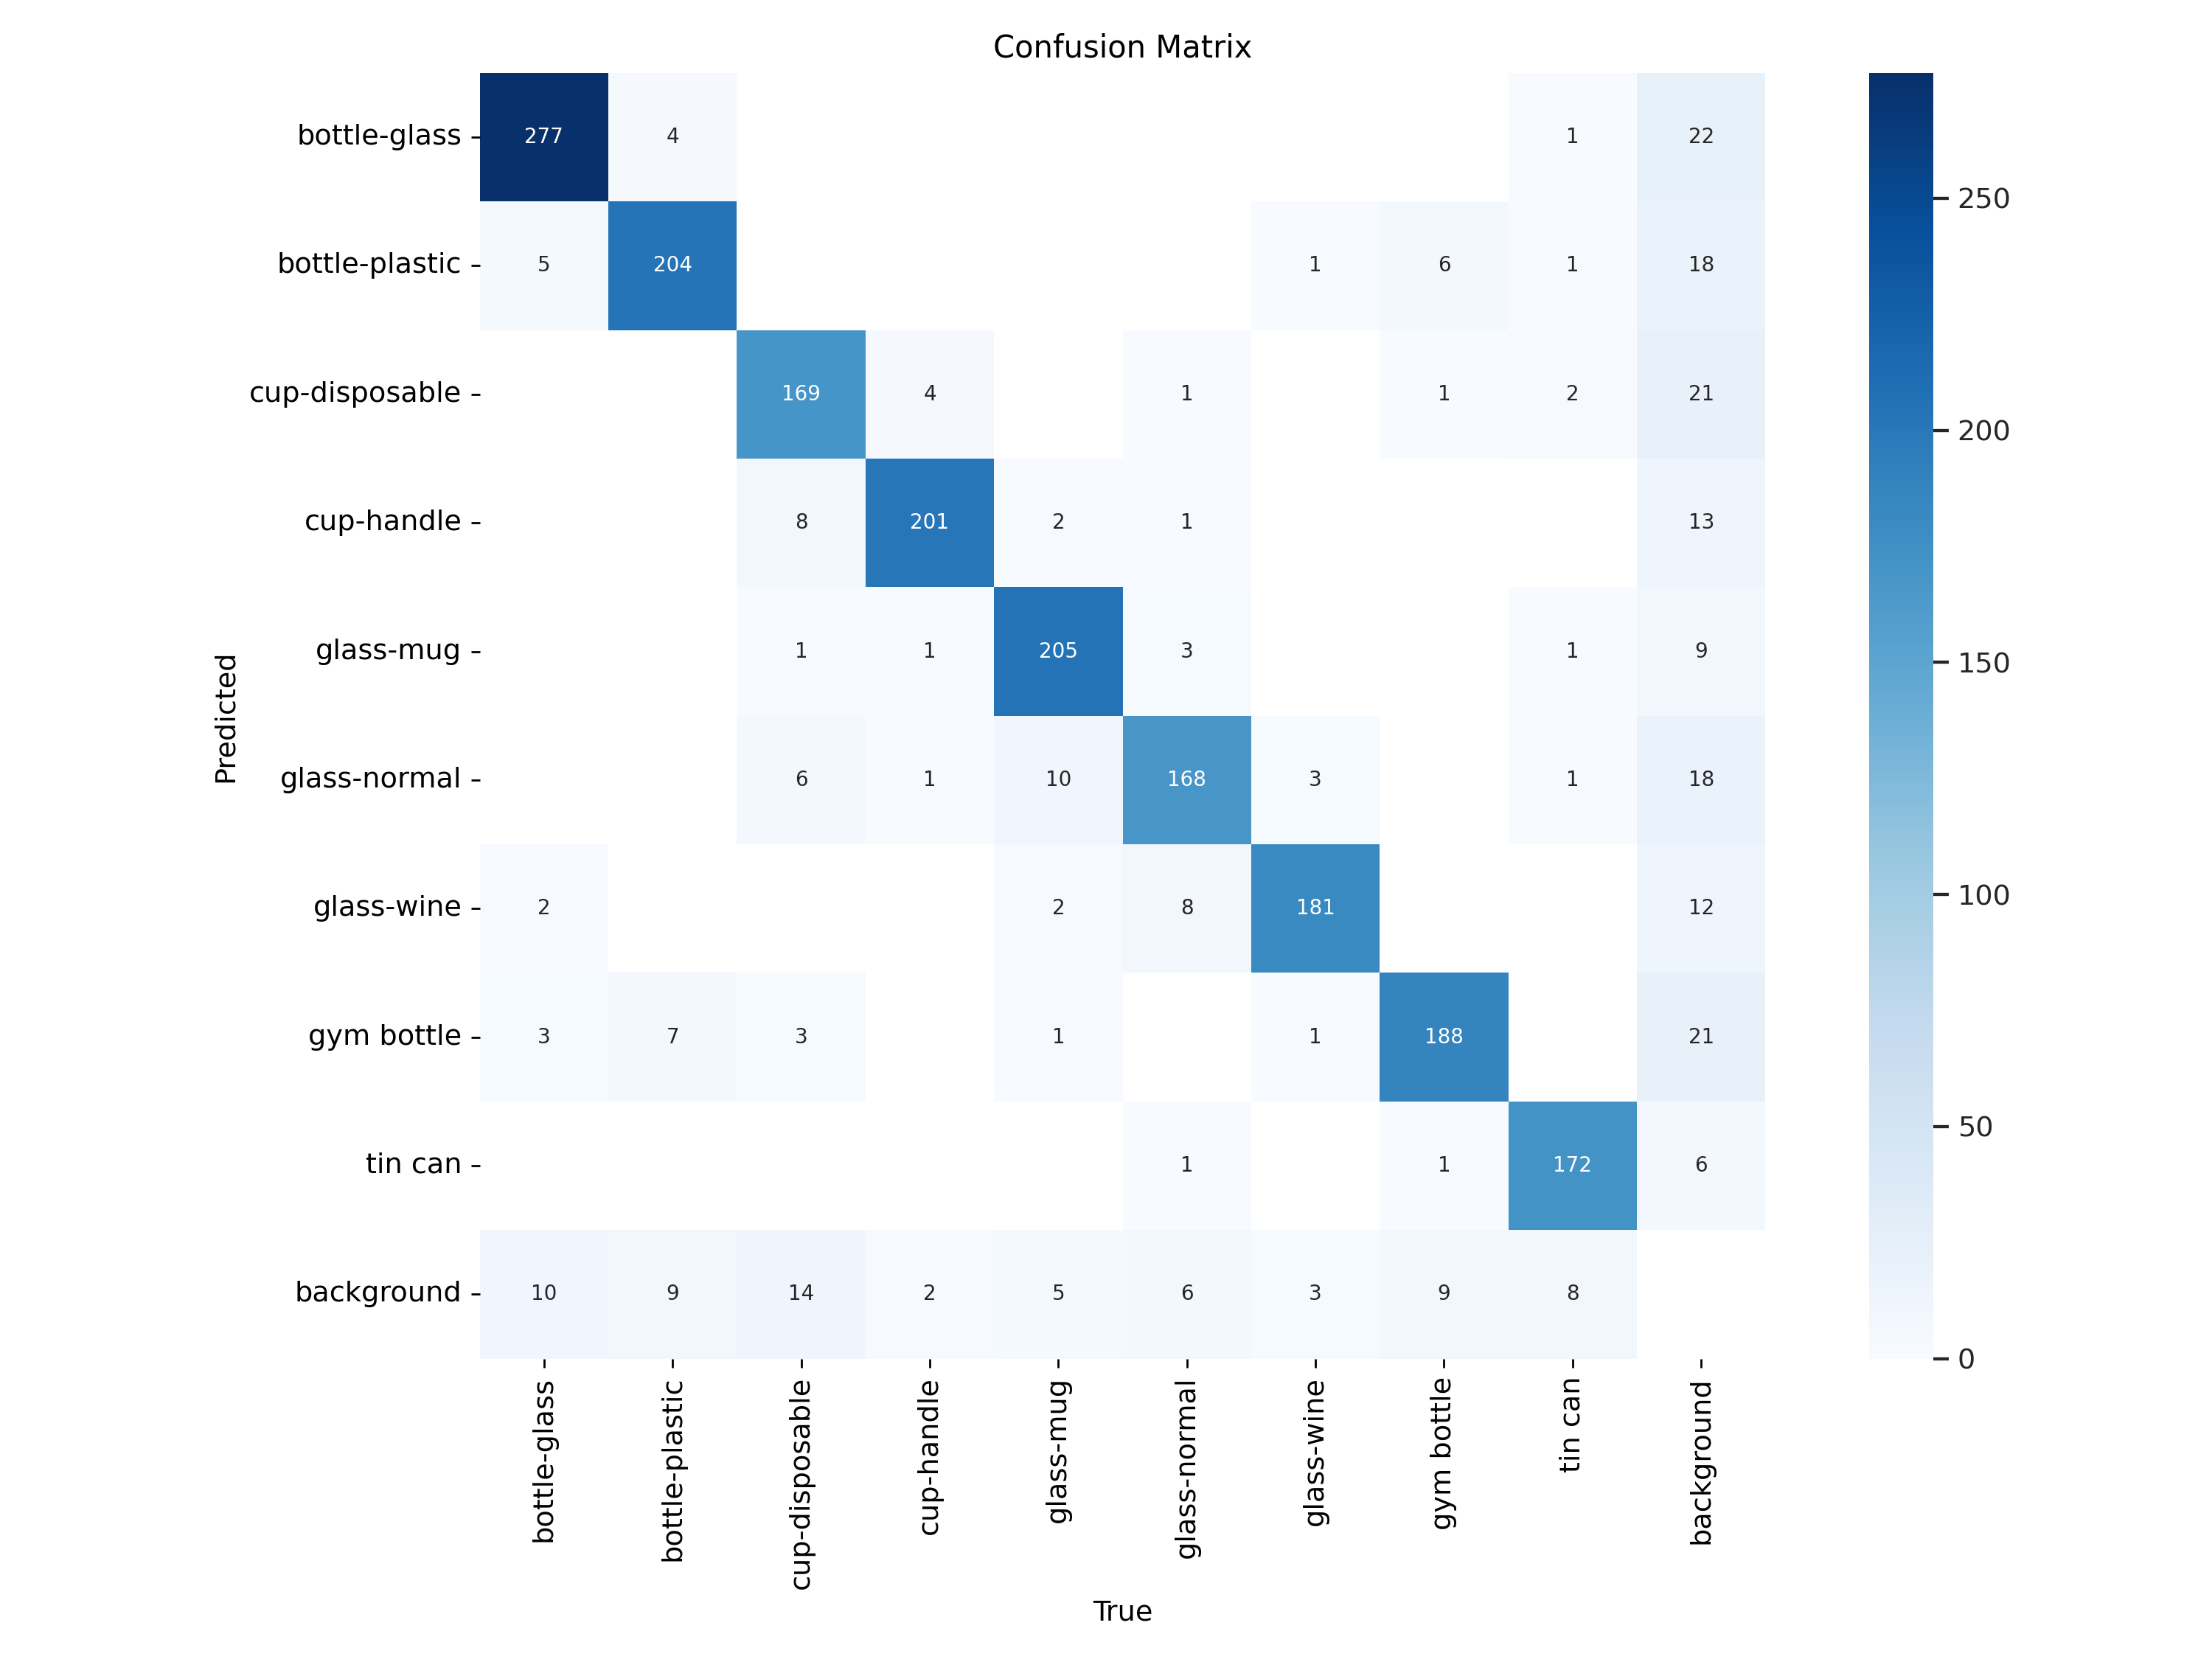

In [8]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

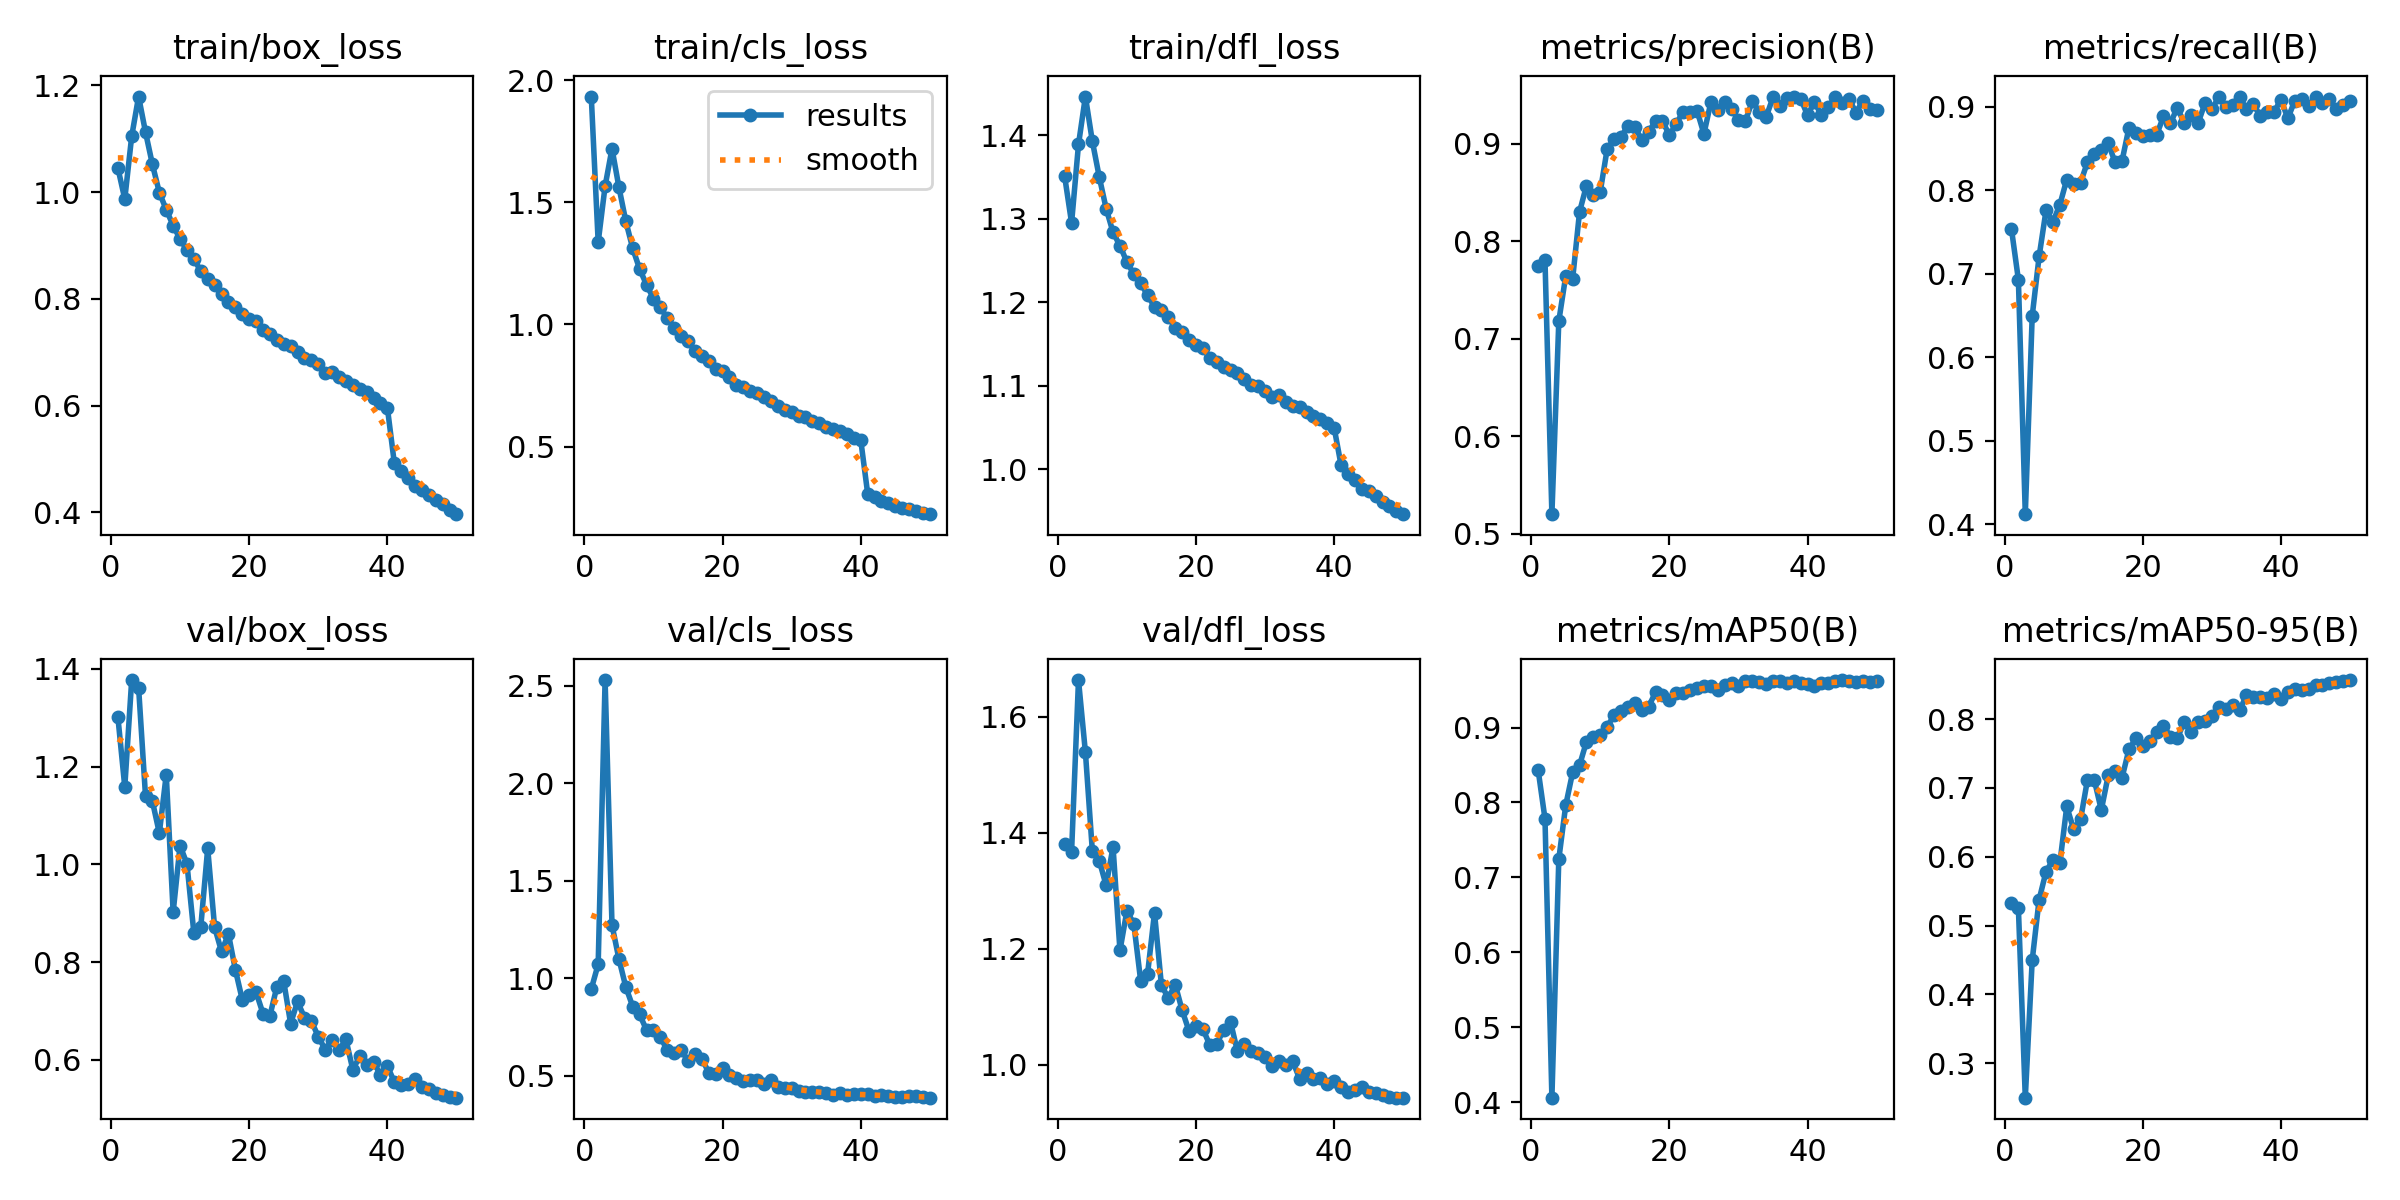

In [9]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

## Validation

In [10]:
!yolo task=detect mode=val model=/{HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml  

Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,416,283 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /kaggle/working/Beverage-Containers-3/valid/labels.cache... 1303 i
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1303       1924      0.934      0.907      0.962      0.857
          bottle-glass        193        297      0.948       0.93      0.975      0.843
        bottle-plastic        176        224      0.919      0.893      0.961      0.841
        cup-disposable        126        201      0.922      0.836      0.926      0.825
            cup-handle        194        209      0.935      0.967      0.989      0.893
             glass-mug        168        225      0.981      0.912      0.971      0.888
          glass-normal        148        188      0.873      0.874      0.929      0.846
            glass-wine        140        189      0.939

## Inference

In [12]:
!yolo task=detect mode=predict model=/{HOME}/runs/detect/train/weights/best.pt conf=.3 source={dataset.location}/test/images  

Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,416,283 parameters, 0 gradients, 21.3 GFLOPs

image 1/653 /kaggle/working/Beverage-Containers-3/test/images/000000002106_jpg.rf.422cea1f9671e91100efce18b983e937.jpg: 640x640 2 glass-wines, 15.6ms
image 2/653 /kaggle/working/Beverage-Containers-3/test/images/000000008711_jpg.rf.aa48431e6cdd5bdd7db0ce4a07f9f959.jpg: 640x640 1 cup-disposable, 15.6ms
image 3/653 /kaggle/working/Beverage-Containers-3/test/images/000000017210_jpg.rf.bea624c84c758678b3340abafcb83dc4.jpg: 640x640 1 cup-disposable, 15.5ms
image 4/653 /kaggle/working/Beverage-Containers-3/test/images/000000067657_jpg.rf.e0316677a4ace11dab0f52f2d720fd6d.jpg: 640x640 1 bottle-glass, 2 glass-wines, 15.5ms
image 5/653 /kaggle/working/Beverage-Containers-3/test/images/000000081944_jpg.rf.afe54045d99f1d291f82e48f93cbc1f6.jpg: 640x640 1 cup-handle, 15.6ms
image 6/653 /kaggle/working/Beverage-Containers-3/test/images/000000

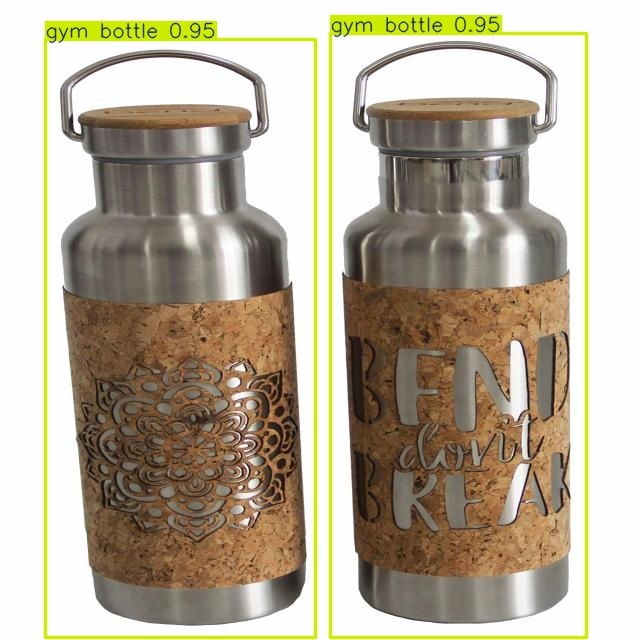

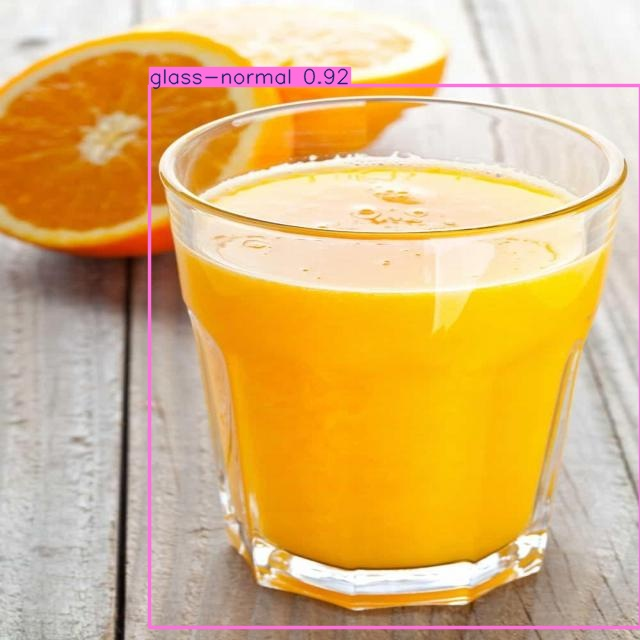

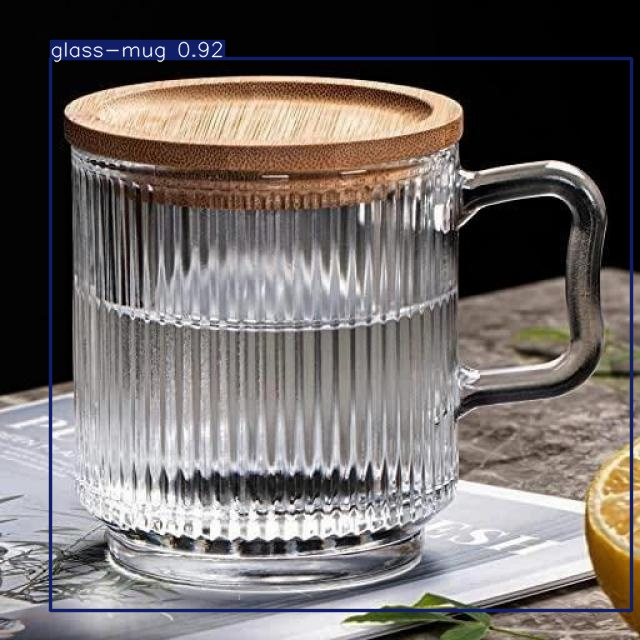

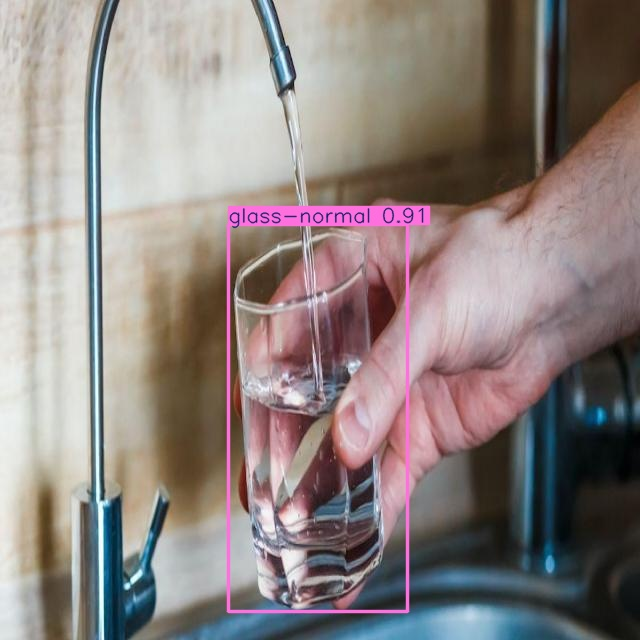

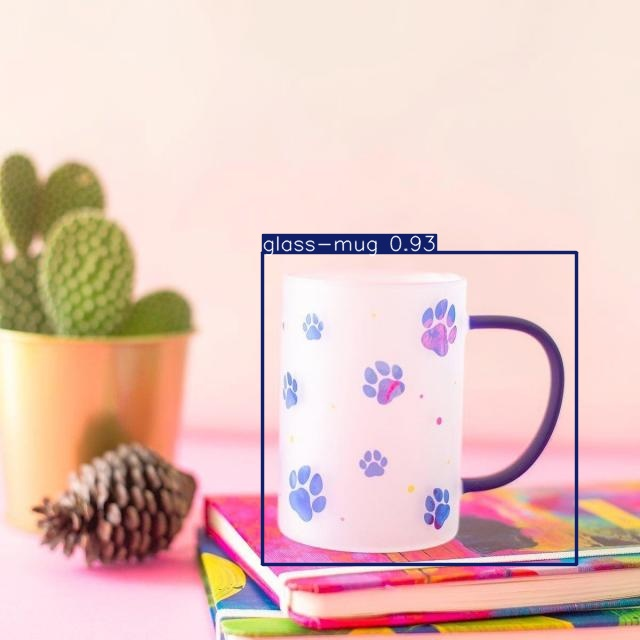

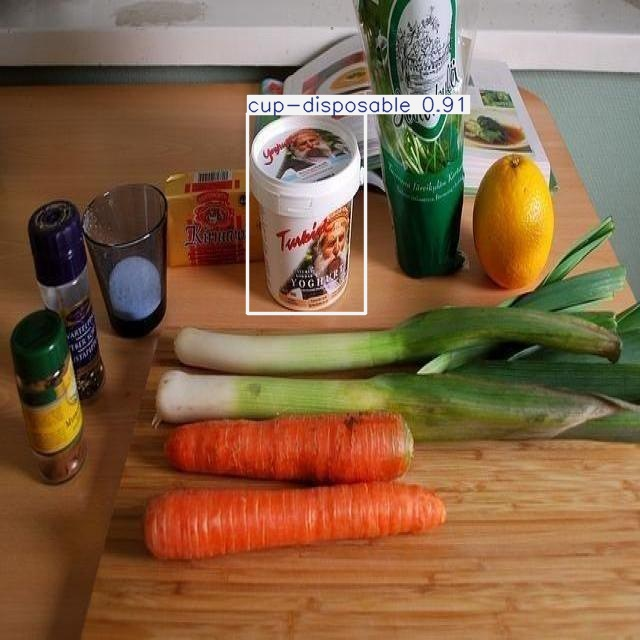

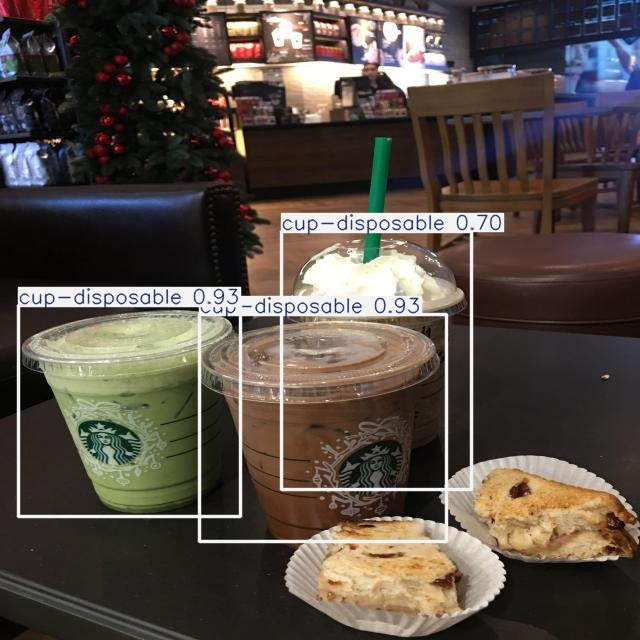

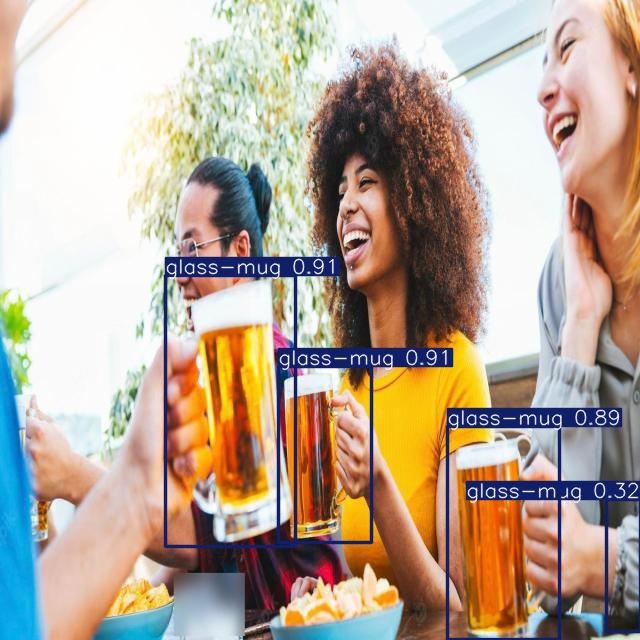

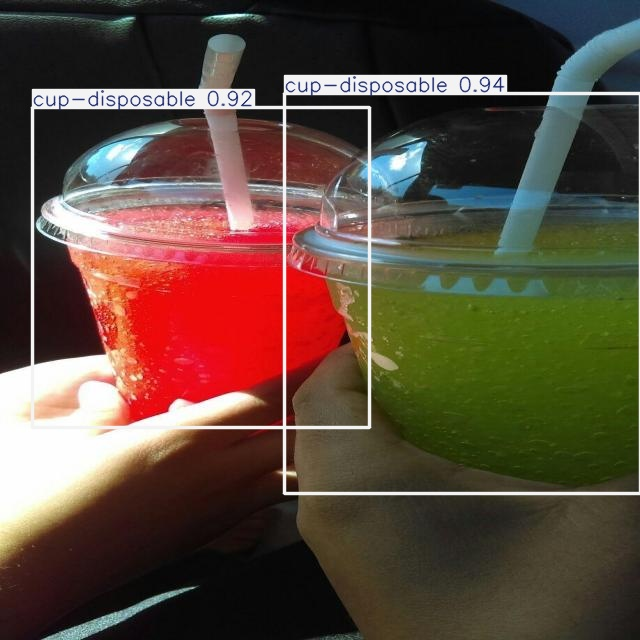

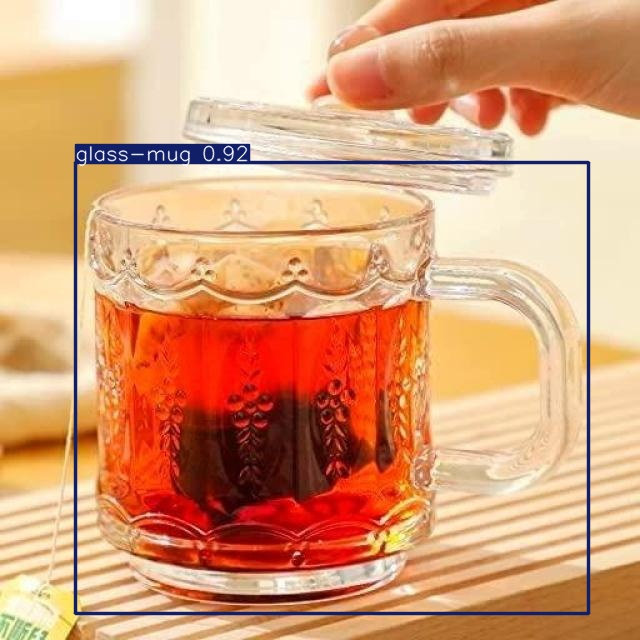

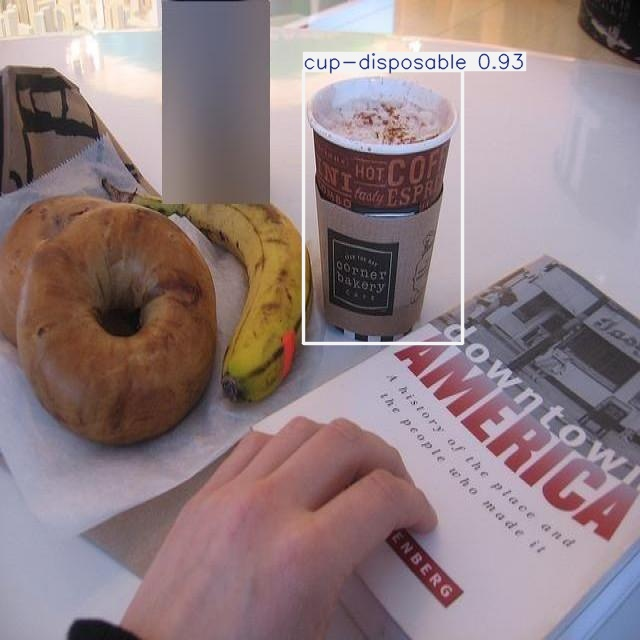

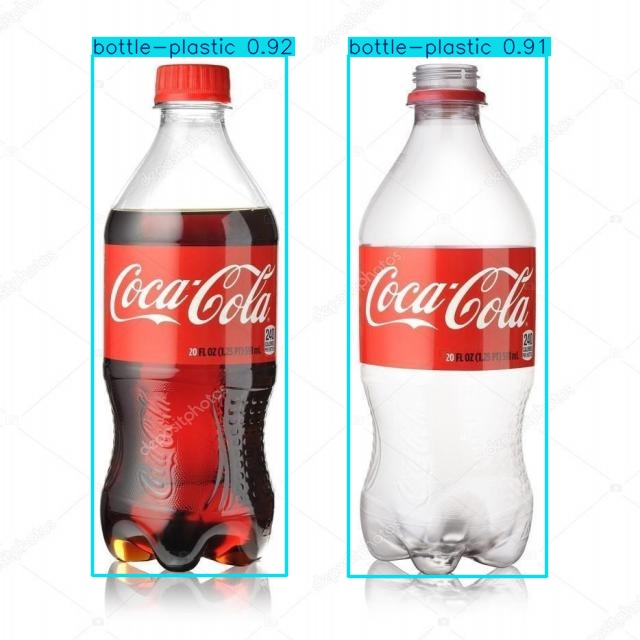

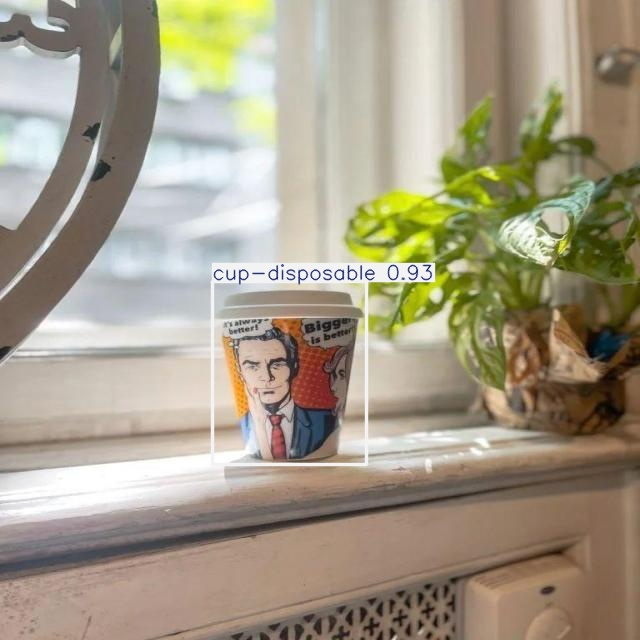

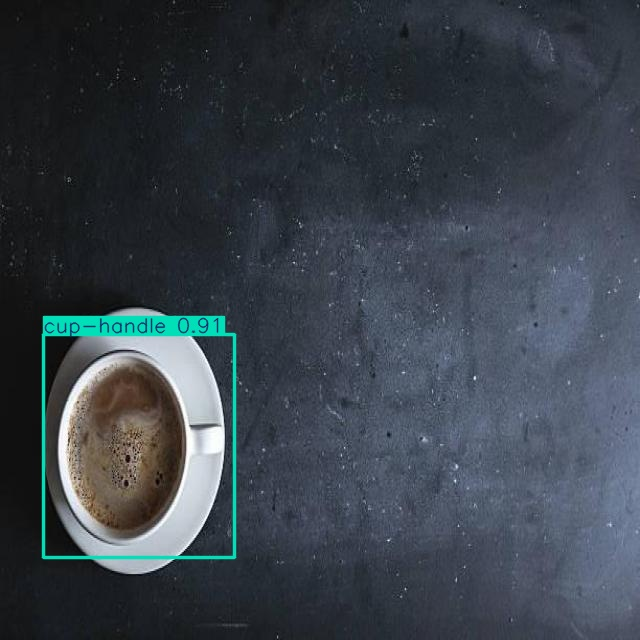

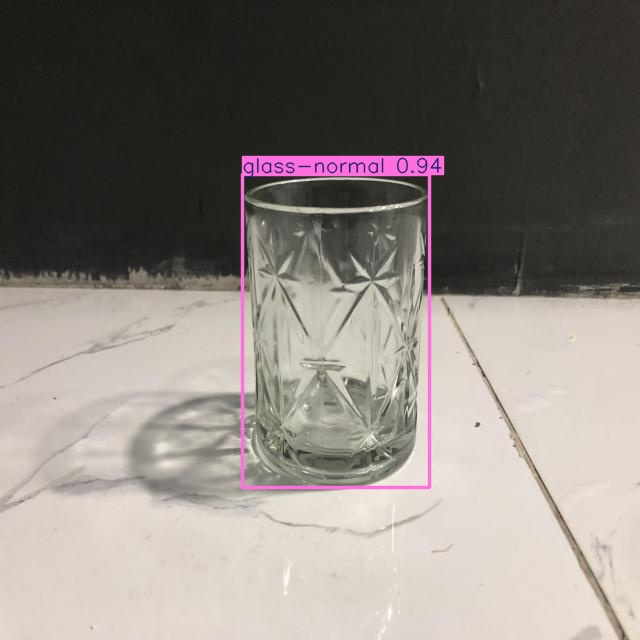

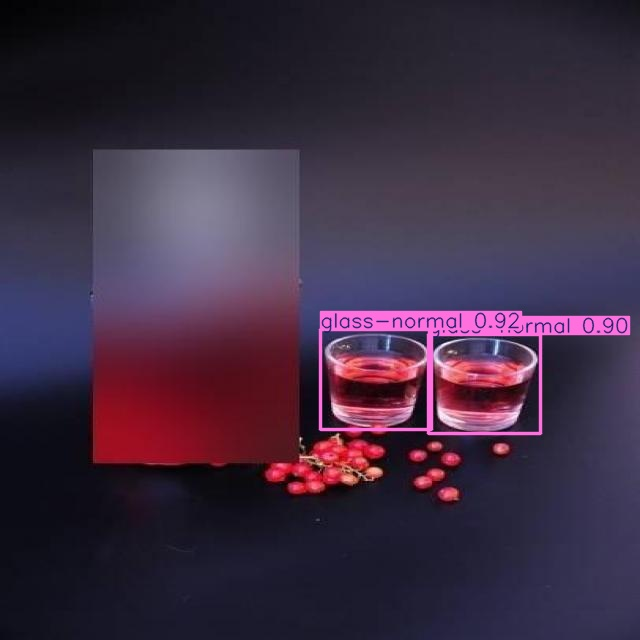

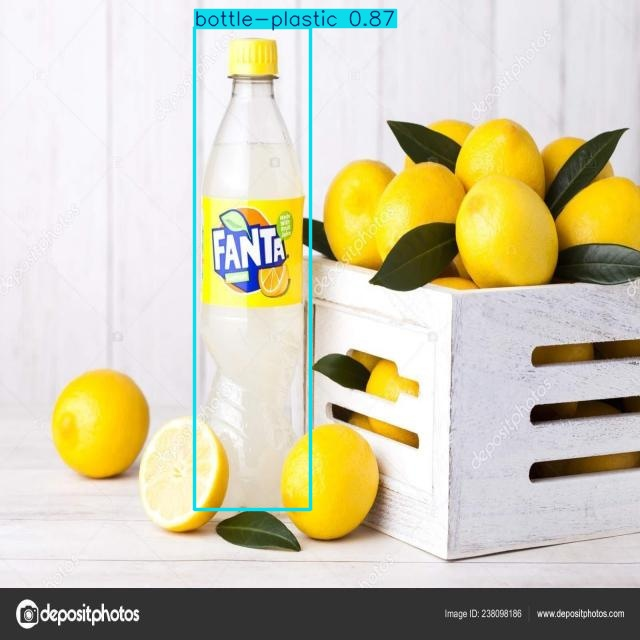

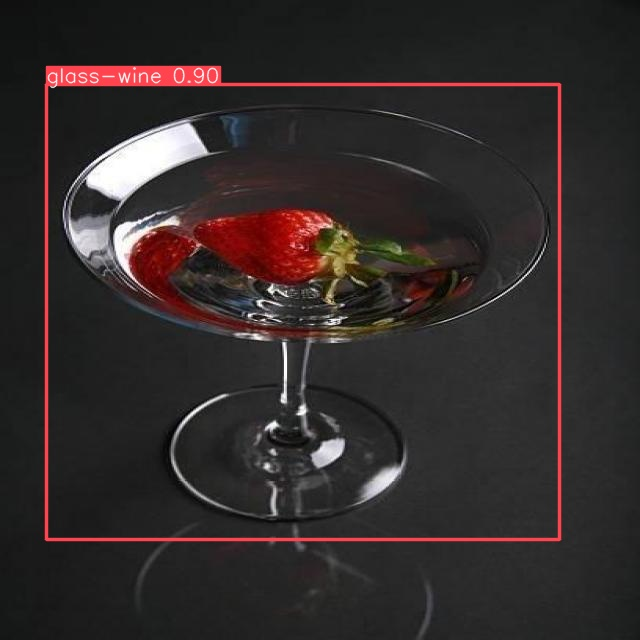

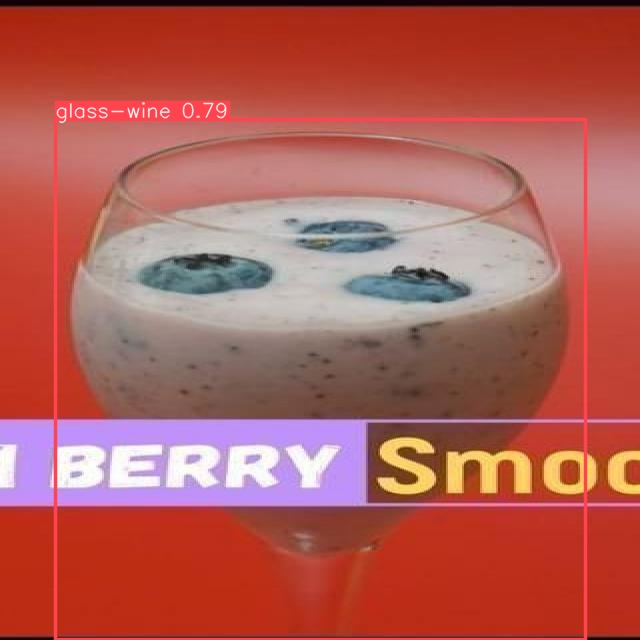

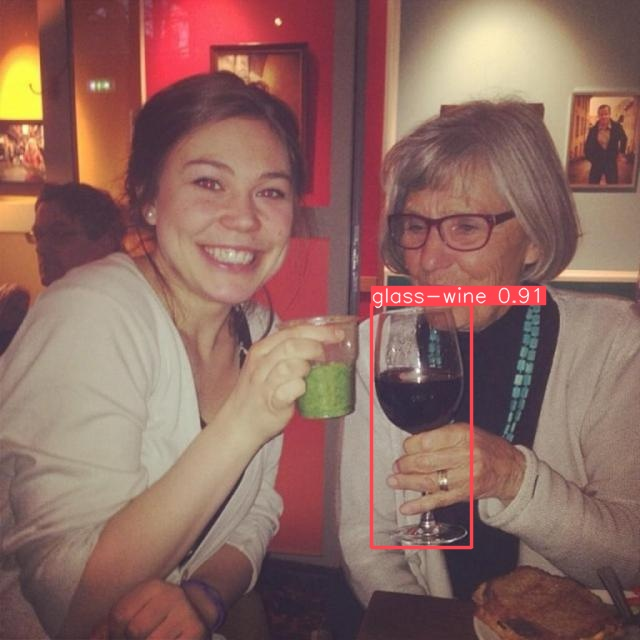

In [13]:
import glob
from IPython.display import display, Image


for img_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:20]:
    display(Image(filename=img_path, width=600))
    print('\n')

## Real Time

In [15]:
# from ultralytics import YOLO
# import os

# #os.chdir('your direction')

# model =YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# model.predict(source='0', show= True, conf= .5)